## <b>■ 복습</b>
    1장. Numpy
    2장. 퍼셉트론
    3장. 신경망 (저자가 만들어온 가중치)
    4장. 신경망 (수치미분을 이용)
        1. 단층 신경망 (p.134)
        2. 다층 신경망 (p.137)
    5장. 신경망 (오차역전파 이용)
    
### <b>■ 단층 신경망 코드구현 (p.134)</b>
![simple](simplelayer.png)

$$T = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix} \\ y = \begin{bmatrix} 0.7 & 0.2 & 0.1 \end{bmatrix} \\ -\sum_{i=1}^{n}t_{i}\cdot \log y_{i} : 오차함수 \\\\
softmax = {{e^{x_{i}}} \over {-\sum_{i=1}^{n}e^{x_{i}}}} \\ \begin{bmatrix} {{e^{k_{1}}} \over {e^{k_{1}}+e^{k_{2}}+e^{k_{3}}}} & {{e^{k_{2}}} \over {e^{k_{1}}+e^{k_{2}}+e^{k_{3}}}} & {{e^{k_{3}}} \over {e^{k_{1}}+e^{k_{2}}+e^{k_{3}}}} \end{bmatrix}$$

In [ ]:
import  sys, os
sys.path.append(os.pardir) 
import  numpy  as  np
from common.functions  import  softmax, cross_entropy_error

class  simpleNet:
    def  __init__(self):
        self.W = np.random.randn(2,3)  # 정규분포로 2x3 행렬의 가중치 생성

    def  predict( self, x ):
        return  np.dot( x, self.W )

    def  loss( self, x, t ):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return  loss 
net = simpleNet()
print ( net.W )  # 가중치 행렬 확인 

x = np.array( [0.6, 0.9] )
y = net.predict(x)
print (y)

print ( np.argmax(y) ) 

t = np.array([ 0, 0, 1])
print ( net.loss(x,t)  )

### ※ 문제63. simpleNet 클래스의 단층 신경망 코드를 활용해서 아래의 신경망을 구현하시오
![two](twosimplelayer.png)

In [5]:
import  sys, os
sys.path.append(os.pardir) 
import  numpy  as  np
from common.functions  import  softmax, cross_entropy_error, relu

class  simpleNet:
    def  __init__(self):
        self.W1 = np.random.randn(2,3)
        self.W2 = np.random.randn(3,2)
        self.W3 = np.random.randn(2,2)

    def  predict( self, x ):
        W1, W2, W3 = self.W1, self.W2, self.W3
        s1 = np.dot(x, W1)
        r1 = relu(s1)
        s2 = np.dot(r1, W2)
        r2 = relu(s2)
        s3 = np.dot(r2, W3)
        y = softmax(s3)
        return  y
    
    def  loss( self, x, t ):
        z = self.predict(x)        
        loss = cross_entropy_error(z, t)

        return  loss 
    
net = simpleNet()

x = np.array( [0.3, 0.8] )
t = np.array([ 0, 1])

print(net.loss(x, t))

0.6931469805599654


### ※ 문제64. 아래의 신경망을 클래스로 만들어서 구현하시오. 오차값을 출력
![three](threelayer.png)

In [19]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir) 
import numpy as np
from common.functions import softmax, cross_entropy_error, relu
from common.gradient import numerical_gradient

class SimpleNet:
    def __init__(self, input_s, hidden1_s, hidden2_s,hidden3_s, output_s):
        self.params={}
        self.params['W1']=np.random.randn(input_s, hidden1_s)
        self.params['W2']=np.random.randn(hidden1_s, hidden2_s)
        self.params['W3']=np.random.randn(hidden2_s, hidden3_s)
        self.params['W4']=np.random.randn(hidden3_s, output_s)        

    def predict(self, x):
        for layer in self.params.values():
            h = np.dot(x, layer)
            self.mask = (h<=0)
            h[self.mask] = 0
        for i in self.output.values():
            hout = np.dot(h, i)
        y = predict(hout)
        return y

    def loss(self, x, t):
        y = softmax(x)
        loss = cross_entropy_error(y, t)

        return loss

if __name__ == '__main__':
    x = np.array([0.4, 0.1, 0.8, 0.9])
    t = np.array([0, 1])
    net = SimpleNet(input_s=4, hidden1_s=5, hidden2_s=4, hidden3_s=5, output_s=2)
    print(net.loss(x,t))

3.4708483084087915


### ※ 문제65. (점심시간 문제) 문제 64번의 클래스에 정확도를 출력하는 함수를 추가하고 정확도를 출력하시오

In [44]:
import sys, os
sys.path.append(os.pardir) 
import numpy as np
from common.functions import softmax, cross_entropy_error, relu
from common.gradient import numerical_gradient

class  simpleNet:
    def  __init__(self,input_s, hidden1_s, hidden2_s, hidden3_s, output_s):
        self.W1 = np.random.randn(input_s,hidden1_s)
        self.W2 = np.random.randn(hidden1_s, hidden2_s)
        self.W3 = np.random.randn(hidden2_s, hidden3_s)
        self.W4 = np.random.randn(hidden3_s, output_s)

    def  predict( self, x ):
        W1, W2, W3, W4 = self.W1, self.W2, self.W3, self.W4
        s1 = np.dot(x, W1)
        r1 = relu(s1)
        s2 = np.dot(r1, W2)
        r2 = relu(s2)
        s3 = np.dot(r2, W3)
        r3 = relu(s3)
        s4 = np.dot(r3, W4)
        y = softmax(s4)
        return  y
    
    def  loss( self, x, t ):
        z = self.predict(x)        
        loss = cross_entropy_error(z, t)

        return  loss
    
    def accuracy(self, x, t):
        z = self.predict(x)
        y = np.argmax(z)
        t = np.argmax(t)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
if __name__ == '__main__':
    x = np.array([0.4, 0.1, 0.8, 0.9])
    t = np.array([0, 1])
    net = simpleNet(4,5,4,5,2)
    print(net.accuracy(x,t))

0.25


### <b>■ 2층 신경망을 설명하기 위해 간소하게 만든 코드</b>

In [60]:
import sys, os

sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import *
from common.gradient import numerical_gradient

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train

class TwoLayerNet:
    def __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784, 50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50, 10)
        self.params['b2'] = np.zeros(10)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def softmax(self, a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y, t):
        delta = 1e-7
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + delta)) / batch_size

    def loss(self, x, t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y_hat = np.argmax(y, axis=1)
        target = np.argmax(t, axis=1)
        accuracy = np.sum(y_hat == target) / float(x.shape[0])

        return accuracy

net = TwoLayerNet()
x, t = get_data()

y = net.predict(x[:100]) # 100장만 넣어서 예측
y_hat = np.argmax(y, axis=1)
print(y_hat)
# y = net.accuracy(x[:100],t[:100])
# print(y)


[8 8 8 5 8 8 5 8 5 8 5 8 5 8 8 8 8 8 8 8 8 8 8 5 8 5 5 8 8 8 5 8 5 8 8 5 8
 8 8 8 5 5 8 8 8 8 8 5 8 5 5 8 8 5 8 8 8 8 5 5 8 8 8 5 8 5 8 5 5 8 8 8 8 8
 5 8 5 5 8 8 8 8 8 8 8 5 5 8 8 8 8 8 8 8 8 8 8 5 5 5]


### ※ 문제66. 위의 예측한 100장에 대한 실제 정답 100개의 숫자는 무엇인가?

In [61]:
print(np.argmax(t[:100],axis=1))

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


### ※ 문제67. 위의 100장에 대한 정확도는 어떻게 되는가?

In [62]:
print(net.accuracy(x[:100],t[:100]))

0.08


    신경망 학습을 시키려면 기울기가 필요한데 기울기를 출력하는 함수를 이용해서 학습을 시킨다.    
        1. numerical_gradient 함수를 TwoLayerNet 클래스에 붙여 넣는다.

In [ ]:
import numpy  as  np

def numerical_gradient(f, x):
    h = 0.0001
    grad = np.zeros_like(x)

    for i in range(x.size):
        tmp_val = x[i]
        x[i] = tmp_val + h
        fxh1 = f(x)

        x[i] = tmp_val - h
        fxh2 = f(x)

        grad[i] = (fxh1 - fxh2) / (2 * h)

        x[i] = tmp_val

    return grad 

In [63]:
def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

In [60]:
import sys, os

sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import *
from common.gradient import numerical_gradient


def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


class TwoLayerNet:
    def __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784, 50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50, 10)
        self.params['b2'] = np.zeros(10)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def softmax(self, a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y, t):
        delta = 1e-7
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + delta)) / batch_size

    def loss(self, x, t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y_hat = np.argmax(y, axis=1)
        target = np.argmax(t, axis=1)
        accuracy = np.sum(y_hat == target) / float(x.shape[0])

        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

net = TwoLayerNet()
x, t = get_data()
# batch_size = np.random.choice(len(x),100)
batch_size = 100
lr = 0.01

for i in range(10):
    x_batch = x[:batch_size]
    t_batch = t[:batch_size]
    grad = net.numerical_gradient(x_batch, t_batch)

    for key in ('W1','W2','b1','b2'):
        net.params[key] -= lr*grad[key]
    y = net.accuracy(x_batch, t_batch)
    print(y)

[8 8 8 5 8 8 5 8 5 8 5 8 5 8 8 8 8 8 8 8 8 8 8 5 8 5 5 8 8 8 5 8 5 8 8 5 8
 8 8 8 5 5 8 8 8 8 8 5 8 5 5 8 8 5 8 8 8 8 5 5 8 8 8 5 8 5 8 5 5 8 8 8 8 8
 5 8 5 5 8 8 8 8 8 8 8 5 5 8 8 8 8 8 8 8 8 8 8 5 5 5]


### ※ 문제68. 입력한 숫자 하나를 처음에 어떻게 예측했는지 출력하고 학습되면서 예측한 숫자가 어떻게 바뀌는지 확인하시오

In [73]:
import sys, os

sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import *
from common.gradient import numerical_gradient


def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


class TwoLayerNet:
    def __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784, 50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50, 10)
        self.params['b2'] = np.zeros(10)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def softmax(self, a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y, t):
        delta = 1e-7
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + delta)) / batch_size

    def loss(self, x, t):
        y = self.predict(x)
        return self.cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y_hat = np.argmax(y, axis=1)
        target = np.argmax(t, axis=1)
        accuracy = np.sum(y_hat == target) / float(x.shape[0])

        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

net = TwoLayerNet()
x, t = get_data()
lr = 0.01



for i in range(10):
    x_batch = x[:batch_size]
    t_batch = t[:batch_size]
    grad = net.numerical_gradient(x_batch, t_batch)
    for key in ('W1','W2','b1','b2'):
        net.params[key] -= lr*grad[key]
    y = net.predict(x_batch)
    y_hat = np.argmax(y, axis = 1)
    print(y_hat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

### ※ 문제69. 인터넷에서 선호하는 사진을 한 장 다운 받아서 사진 사이즈를 확인하시오

In [70]:
print('200*200')

200*200


### ※ 문제70. 지금 받은 사진을 흑백으로 변환하시오

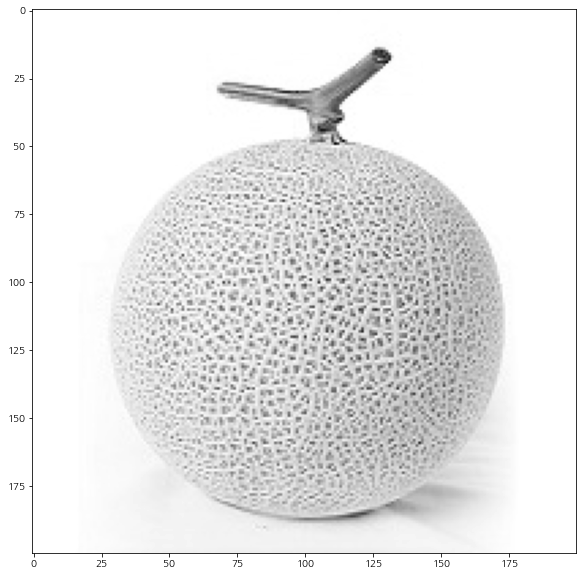

(200, 200)
(40000,)


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize']=(20,10)

j = 'd:/dl/melon.jpg'

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread(j)
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

print(gray.shape)
a = np.array(gray)

x = a.flatten()
print(x.shape) 

### ※ 문제71. 지금 다운 받은 사진을 우리가 만든 2층 신경망에 넣어서 학습시키시오

In [77]:
import sys, os

sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import *
from common.gradient import numerical_gradient


def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


class TwoLayerNet:
    def __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(40000, 50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50, 10)
        self.params['b2'] = np.zeros(10)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def softmax(self, a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y, t):
        delta = 1e-7
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + delta)) / batch_size

    def loss(self, x, t):
        y = self.predict(x)
        return self.cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y_hat = np.argmax(y, axis=1)
        target = np.argmax(t, axis=1)
        accuracy = np.sum(y_hat == target) / float(x.shape[0])

        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

net = TwoLayerNet()
x, t = get_data()
lr = 0.01

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize']=(20,10)

j = 'd:/dl/melon.jpg'

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread(j)
gray = rgb2gray(img)
# plt.imshow(gray, cmap = plt.get_cmap('gray'))
# plt.show()

a = np.array(gray)

x = a.flatten()
x = x.reshape(1,40000)

for i in range(10):
    x_batch = x
    t_batch = t[:1]
    grad = net.numerical_gradient(x_batch, t_batch)
    for key in ('W1','W2','b1','b2'):
        net.params[key] -= lr*grad[key]
    y = net.predict(x_batch)
    y_hat = np.argmax(y, axis = 1)
    print(y_hat)

D:\dl\common\functions.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


KeyboardInterrupt: 

### <b>■ 수치미분을 이용해서 mnist 필기체 데이터를 학습시키는 전체 코드</b>
    실제로 도는 것은 오차 역전파를 이용함

In [ ]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### <b>■ 힘들게 학습 시켜서 만들어 놓은 가중치를 파일로 저장하는 방법</b>
    pickle을 이용

In [78]:
# 예제1. pickle 파일 생성
import pickle
list = ['a','b','c']
with open('d:/dl/list.pkl','wb') as f:
    pickle.dump(list, f)

In [80]:
# 예제2. pickle 파일을 파이썬으로 로드하는 예제
with open('d:/dl/list.pkl','rb') as f:
    data = pickle.load(f)
print(data)

['a', 'b', 'c']


### ※ 문제72. 오차 역전파로 학습시킨 2층 신경망의 가중치와 바이어스를 mnist_test.pkl로 생성하시오
    학습 신경망 코드 맨 아래줄에 다음 코드를 추가하고 돌리면 된다.

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.80155, 0.8062
train acc, test acc | 0.8758333333333334, 0.8792
train acc, test acc | 0.8976833333333334, 0.8999
train acc, test acc | 0.9063833333333333, 0.9086
train acc, test acc | 0.9137333333333333, 0.9158
train acc, test acc | 0.91915, 0.9202
train acc, test acc | 0.9222166666666667, 0.925
train acc, test acc | 0.92715, 0.9291
train acc, test acc | 0.9303666666666667, 0.9312
train acc, test acc | 0.9336, 0.9341
train acc, test acc | 0.9367166666666666, 0.9364
train acc, test acc | 0.9392166666666667, 0.9385
train acc, test acc | 0.9411666666666667, 0.9401
train acc, test acc | 0.9430666666666667, 0.9423
train acc, test acc | 0.9449, 0.9437
train acc, test acc | 0.9468833333333333, 0.9447


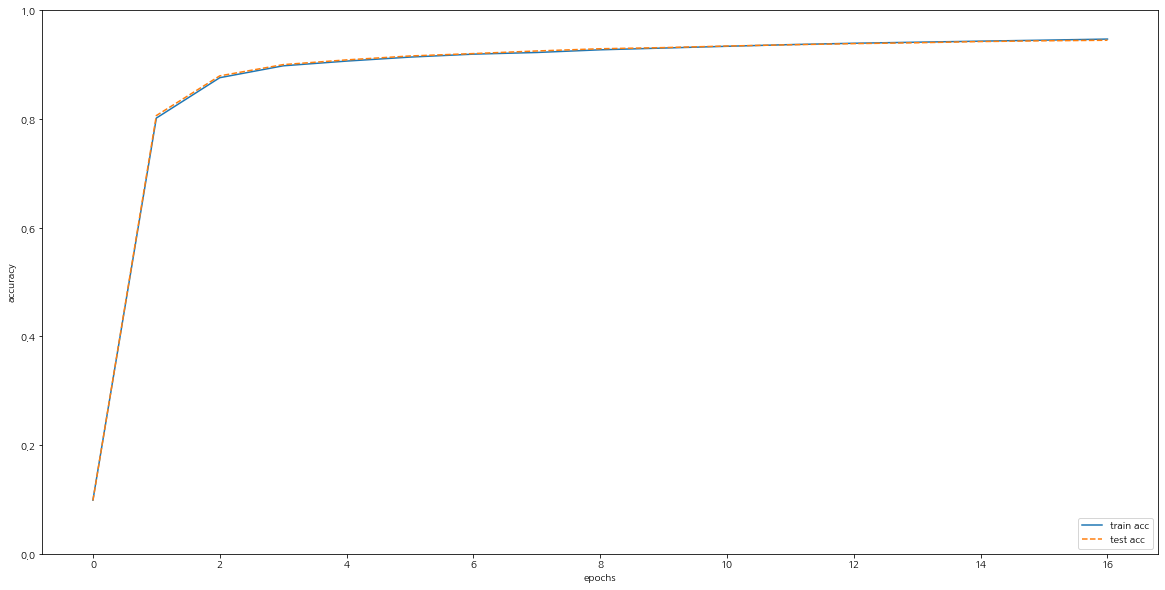

In [81]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

import pickle
with open('d:/dl/mnist_test.pkl','wb') as f:
    pickle.dump(network.params, f)